In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ftplib import FTP
import gzip
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [84]:
# load data
df = pd.read_csv("/Users/alishagumber/Desktop/Bioinformatics/LeukemiaStudy/data_set_ALL_AML_train.tsv", sep='\t')

In [85]:
# reset index so the first column has a name 
df.reset_index(level=0, inplace=True)

In [86]:
df.head()

,index,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,A,-318,A,-32,A,-124,A,-135,A,NaN
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,A,-192,A,-49,A,-79,A,-186,A,NaN
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,A,-95,A,49,A,-37,A,-70,A,NaN
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,A,312,A,230,P,330,A,337,A,NaN
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,A,-139,A,-367,A,-188,A,-407,A,NaN


In [87]:
# dropping all rows with instances of "(endogenous control)" from the index column
df_new = df[~df['index'].str.contains(pat='(endogenous control)')]
df_new.head()

,index,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
18,hum_alu_at (miscellaneous control),hum_alu_at,15091,P,11038,P,16692,P,15763,P,...,P,11983,P,23508,P,17996,P,19679,P,NaN
59,GB DEF = GABAa receptor alpha-3 subunit,A28102_at,151,A,263,P,88,A,484,A,...,A,382,M,486,P,388,A,260,A,NaN
60,Osteomodulin,AB000114_at,72,A,21,A,-27,A,61,A,...,A,1,A,-23,A,56,A,-27,A,NaN
61,mRNA,AB000115_at,281,A,250,P,358,P,118,A,...,A,239,P,221,A,405,P,1306,P,NaN
62,Semaphorin E,AB000220_at,36,A,43,A,42,A,39,A,...,A,72,A,39,A,192,P,32,A,NaN


In [88]:
# drop index and gene accession number columns since they are not useful right now
df_new = df_new.drop(columns=['index', 'Gene Accession Number'])

In [89]:
df_new.head()

,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
18,hum_alu_at,P,11038,P,16692,P,15763,P,18128,P,...,P,11983,P,23508,P,17996,P,19679,P,NaN
59,A28102_at,A,263,P,88,A,484,A,118,P,...,A,382,M,486,P,388,A,260,A,NaN
60,AB000114_at,A,21,A,-27,A,61,A,16,A,...,A,1,A,-23,A,56,A,-27,A,NaN
61,AB000115_at,A,250,P,358,P,118,A,197,M,...,A,239,P,221,A,405,P,1306,P,NaN
62,AB000220_at,A,43,A,42,A,39,A,39,A,...,A,72,A,39,A,192,P,32,A,NaN


In [90]:
# drop numbered columns, also not useful right now
df_new = df_new.drop(columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
                             '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
                              '26', '27', '28', '29', '30', '31', '32', '33', '34','35','36','37','38'])

In [91]:
df_new.head()

,Gene Description,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,...,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36,call.37
18,hum_alu_at,11038,16692,15763,18128,34207,30801,25147,15272,21801,...,23865,17359,19406,17878,26052,11983,23508,17996,19679,NaN
59,A28102_at,263,88,484,118,270,458,872,62,194,...,50,249,357,190,318,382,486,388,260,NaN
60,AB000114_at,21,-27,61,16,85,-10,25,-38,65,...,-35,36,-17,39,1,1,-23,56,-27,NaN
61,AB000115_at,250,358,118,197,71,168,296,198,113,...,74,328,74,214,103,239,221,405,1306,NaN
62,AB000220_at,43,42,39,39,32,10,59,27,39,...,39,12,51,71,-61,72,39,192,32,NaN


In [93]:
# find all instances of NA values
print('NA values in DF:', df_new.isna().sum().sum())

NA values in DF: 7071


In [94]:
# all NA values are in the last column - drop column
df_new = df_new.drop(columns=['call.37'])

In [95]:
df_new.head()

,Gene Description,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,...,call.27,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36
18,hum_alu_at,11038,16692,15763,18128,34207,30801,25147,15272,21801,...,45492,23865,17359,19406,17878,26052,11983,23508,17996,19679
59,A28102_at,263,88,484,118,270,458,872,62,194,...,473,50,249,357,190,318,382,486,388,260
60,AB000114_at,21,-27,61,16,85,-10,25,-38,65,...,0,-35,36,-17,39,1,1,-23,56,-27
61,AB000115_at,250,358,118,197,71,168,296,198,113,...,341,74,328,74,214,103,239,221,405,1306
62,AB000220_at,43,42,39,39,32,10,59,27,39,...,-7,39,12,51,71,-61,72,39,192,32


In [98]:
# got rid of all NA's
df_new.isna().sum().sum()

0

In [109]:
# normalize the data
# select all columns except first to apply normalization function to
df_norm = df_new.loc[:, df_new.columns != 'Gene Description']
df_norm = df_norm.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1) # remember to set it equal to something otherwise results won't save!
df_norm.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.27,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36
18,-1.251103,-0.496878,-0.620803,-0.305320,1.839567,1.385217,0.630992,-0.686301,0.184646,-0.300118,...,3.344950,0.459977,-0.407902,-0.134839,-0.338669,0.751716,-1.125043,0.412355,-0.322928,-0.098422
59,-0.084972,-1.040173,1.121310,-0.876424,-0.046764,0.979394,3.239127,-1.182089,-0.461594,-0.739967,...,1.061269,-1.247588,-0.161388,0.428107,-0.483428,0.215234,0.564564,1.132227,0.597314,-0.101347
60,-0.155716,-1.059482,0.597422,-0.249859,1.049304,-0.739398,-0.080403,-1.266595,0.672735,-2.641071,...,-0.551114,-1.210109,0.126710,-0.871197,0.183196,-0.532285,-0.532285,-0.984168,0.503279,-1.059482
61,-0.151349,0.100752,-0.459474,-0.275066,-0.569185,-0.342760,-0.043973,-0.272732,-0.471145,-0.352097,...,0.061070,-0.562182,0.030724,-0.562182,-0.235383,-0.494488,-0.177026,-0.219043,0.210463,2.313645
62,0.148770,0.125043,0.053865,0.053865,-0.112218,-0.634195,0.528389,-0.230849,0.053865,-0.420659,...,-1.037540,0.053865,-0.586742,0.338579,0.813103,-2.318754,0.836829,0.053865,3.683972,-0.112218


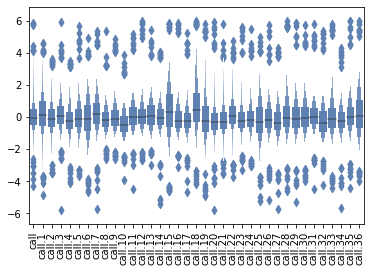

In [111]:
# create a boxplot of normalized data
sns.boxenplot(data=df_norm, color='#507fbf')
_ = plt.xticks(rotation=90)

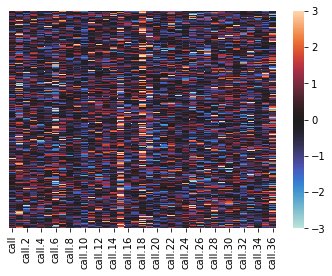

In [114]:
# create heatmap
sns.heatmap(data=df_norm, vmax=3, vmin=-3, center=0, yticklabels=False)

In [135]:
# extract ALL samples
ALL_samples = []
for i in range (0,27):
    ALL_samples.append('call.{}'.format(i))
ALL_samples[0] = 'call'
ALL_samples

['call',
 'call.1',
 'call.2',
 'call.3',
 'call.4',
 'call.5',
 'call.6',
 'call.7',
 'call.8',
 'call.9',
 'call.10',
 'call.11',
 'call.12',
 'call.13',
 'call.14',
 'call.15',
 'call.16',
 'call.17',
 'call.18',
 'call.19',
 'call.20',
 'call.21',
 'call.22',
 'call.23',
 'call.24',
 'call.25',
 'call.26']

In [137]:
# extract AML samples
AML_samples = []
for i in range (27,37):
    AML_samples.append('call.{}'.format(i))
AML_samples

['call.27',
 'call.28',
 'call.29',
 'call.30',
 'call.31',
 'call.32',
 'call.33',
 'call.34',
 'call.35',
 'call.36']

In [140]:
# add new columns and calculate mean and sd for Welch's t-test
df_norm[['ALL_mean', 'ALL_std']] = df_norm[ALL_samples].agg(['mean', 'std'], axis=1)
df_norm[['AML_mean', 'AML_std']] = df_norm[AML_samples].agg(['mean', 'std'], axis=1)
df_norm.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.31,call.32,call.33,call.34,call.35,call.36,ALL_mean,ALL_std,AML_mean,AML_std
18,-1.251103,-0.496878,-0.620803,-0.305320,1.839567,1.385217,0.630992,-0.686301,0.184646,-0.300118,...,-0.338669,0.751716,-1.125043,0.412355,-0.322928,-0.098422,-0.094118,0.939445,0.254119,1.209617
59,-0.084972,-1.040173,1.121310,-0.876424,-0.046764,0.979394,3.239127,-1.182089,-0.461594,-0.739967,...,-0.483428,0.215234,0.564564,1.132227,0.597314,-0.101347,-0.074258,1.104384,0.200496,0.725554
60,-0.155716,-1.059482,0.597422,-0.249859,1.049304,-0.739398,-0.080403,-1.266595,0.672735,-2.641071,...,0.183196,-0.532285,-0.532285,-0.984168,0.503279,-1.059482,0.182498,1.085092,-0.492746,0.583071
61,-0.151349,0.100752,-0.459474,-0.275066,-0.569185,-0.342760,-0.043973,-0.272732,-0.471145,-0.352097,...,-0.235383,-0.494488,-0.177026,-0.219043,0.210463,2.313645,-0.013541,1.084538,0.036560,0.843267
62,0.148770,0.125043,0.053865,0.053865,-0.112218,-0.634195,0.528389,-0.230849,0.053865,-0.420659,...,0.813103,-2.318754,0.836829,0.053865,3.683972,-0.112218,-0.063887,0.760221,0.172496,1.547971


In [142]:
# define welch's t-test
def welch_t_test(row):
    return (
        (row['ALL_mean'] - row['AML_mean']) / 
        np.sqrt(
            row['ALL_std']/len(ALL_samples) + row['AML_std']/len(AML_samples)
        )
    )
# only apply t-test to applicable columns
df_norm['similarity'] = df_norm[['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std']].apply(welch_t_test, axis=1)
df_norm.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.32,call.33,call.34,call.35,call.36,ALL_mean,ALL_std,AML_mean,AML_std,similarity
18,-1.251103,-0.496878,-0.620803,-0.305320,1.839567,1.385217,0.630992,-0.686301,0.184646,-0.300118,...,0.751716,-1.125043,0.412355,-0.322928,-0.098422,-0.094118,0.939445,0.254119,1.209617,-0.882375
59,-0.084972,-1.040173,1.121310,-0.876424,-0.046764,0.979394,3.239127,-1.182089,-0.461594,-0.739967,...,0.215234,0.564564,1.132227,0.597314,-0.101347,-0.074258,1.104384,0.200496,0.725554,-0.815691
60,-0.155716,-1.059482,0.597422,-0.249859,1.049304,-0.739398,-0.080403,-1.266595,0.672735,-2.641071,...,-0.532285,-0.532285,-0.984168,0.503279,-1.059482,0.182498,1.085092,-0.492746,0.583071,2.151553
61,-0.151349,0.100752,-0.459474,-0.275066,-0.569185,-0.342760,-0.043973,-0.272732,-0.471145,-0.352097,...,-0.494488,-0.177026,-0.219043,0.210463,2.313645,-0.013541,1.084538,0.036560,0.843267,-0.141993
62,0.148770,0.125043,0.053865,0.053865,-0.112218,-0.634195,0.528389,-0.230849,0.053865,-0.420659,...,-2.318754,0.836829,0.053865,3.683972,-0.112218,-0.063887,0.760221,0.172496,1.547971,-0.552645


In [143]:
# discard the last 5 columns created to plot heatmap
df_sorted = df_norm.sort_values('similarity').drop(columns=['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std', 'similarity'])

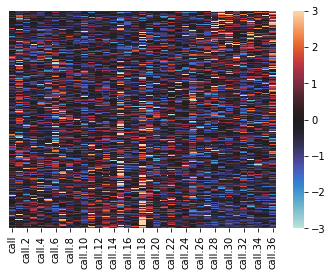

In [145]:
# plot heatmap of all genes. Can start to see pattern (more red in upper right and lower left samples)
sns.heatmap(data=df_sorted, vmax=3, vmin=-3, center=0, yticklabels=False)

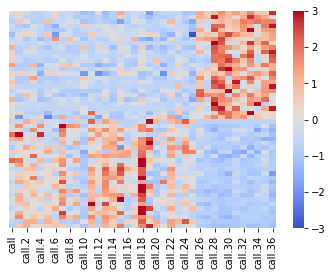

In [147]:
# plot top 25 genes of each sample in heatmap
df_features = df_sorted.head(25).append(df_sorted.tail(25))
sns.heatmap(data=df_features, vmax=3, vmin=-3, center=0, yticklabels=False, cmap='coolwarm')